## Coding activity 2: Average risk minimization

In [1]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from matplotlib import pyplot as plt
import numpy as np

We'll work with the function
$$
r(x) := \frac x2\cos(4\pi x),
$$
drawing our $Y_i$ from $N(r(x_i), 0.1)$.

Our goal is to compute the average risks, $R(\hat r_k, r)$, for $k=1,\ldots,10$, plot the results, and identity the $k$ that minimizes this quantity.

In [2]:
def r(x):
    """A convenience function to compute values of r."""
    return 0.5*x*np.cos(4*np.pi*x)

def make_y(x):
    """A convenience function to sample from N(r(x), 0.1)."""
    return r(x) + 0.1*np.random.normal(size=len(x))

- Choose $x_i$, $i=1,\ldots,n$ uniformly at random from $(0,1)$. (We'll use $n=50$.)
- Sample $y_i$ from $N(r(x_i), 0.1)$.
- Encode $r(x)$ by recording its values at $1000$ equally spaced points in $[0,1]$.
- Approximate $R(\hat r(x), r(x))$ by taking the average of $50$ independent computations of $L(\hat r(x), r(x))$. (Draw new $Y_i$ for each computation.)
- `KNeighborsRegressor(n_neighbors=k)` gives you a class instance that implements the `Regressor` API. As such, it has `fit` and `predict` methods, just like your `NNS` class from the previous activity. Use them to compute $\hat r(x)$.

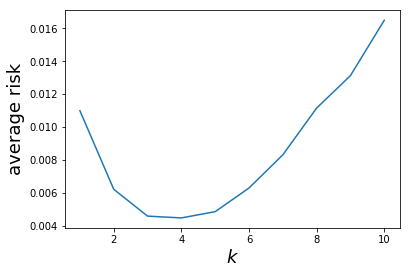

The k giving the smallest average risk is k = 4.


In [3]:
np.random.seed(666) # so we can all compare answers
n = 50 # number of data points
k = 4 

X = np.random.uniform(size=n)

x = np.arange(0, 1, 0.001)
y = r(x)

average_risks = []

for k in range(1, 11):
    losses = []
    for j in range(50):
        R = KNeighborsRegressor(n_neighbors=k)
        R.fit(X.reshape(-1, 1), make_y(X))

        y_ = R.predict(x.reshape(-1, 1))
        loss = (y - y_)**2
        losses.append(loss)
        
    average_risk = np.mean(losses)
    average_risks.append(average_risk)

plt.xlabel("$k$", fontsize=18)
plt.ylabel("average risk", fontsize=18)
plt.plot(range(1, 11), average_risks)
plt.show()

print(f"The k giving the smallest average risk is k = {np.argmin(average_risks) + 1}.")